In [1]:
import pathlib
import numpy as np
import pandas as pd
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = 'all'
from deepplot import Roc_Auc_Plot
from deepplot import paths_sorted, ModelResultsEvaluation, MultiModelResultsEvaluation
%matplotlib inline

In [2]:
# indir = pathlib.Path('/media/tx-deepocean/Data/workdir/wyd/2023/ChongFuEr_Infer_Valid/autoML/saved/flaml/chongfu2liver_native1/Results')
# outdir = pathlib.Path('./output_data/native1')
# indir = pathlib.Path('/media/tx-deepocean/Data/workdir/wyd/2023/ChongFuEr_Infer_Valid/autoML/saved/flaml/chongfu2liver_native2/Results')
# outdir = pathlib.Path('./output_data/native2')
# indir = pathlib.Path('/media/tx-deepocean/Data/workdir/wyd/2023/ChongFuEr_Infer_Valid/autoML/saved/flaml/chongfu2liver_native3/Results')
# outdir = pathlib.Path('./output_data/native3')
# indir = pathlib.Path('/media/tx-deepocean/Data/workdir/wyd/2023/ChongFuEr_Infer_Valid/autoML/saved/flaml/chongfu2liver_post1/Results')
# outdir = pathlib.Path('./output_data/post1')
indir = pathlib.Path('/media/tx-deepocean/Data/workdir/wyd/2023/ChongFuEr_Infer_Valid/autoML/saved/flaml/chongfu2liver_post2/Results')
outdir = pathlib.Path('./output_data/post2')
# indir = pathlib.Path('/media/tx-deepocean/Data/workdir/wyd/2023/ChongFuEr_Infer_Valid/autoML/saved/flaml/chongfu2liver_post3/Results')
# outdir = pathlib.Path('./output_data/post3')
# indir = pathlib.Path('/media/tx-deepocean/Data/workdir/wyd/2023/ChongFuEr_Infer_Valid/autoML/saved/flaml/chongfu2liver_delay1/Results')
# outdir = pathlib.Path('./output_data/delay1')
# indir = pathlib.Path('/media/tx-deepocean/Data/workdir/wyd/2023/ChongFuEr_Infer_Valid/autoML/saved/flaml/chongfu2liver_delay2/Results')
# outdir = pathlib.Path('./output_data/delay2')
# indir = pathlib.Path('/media/tx-deepocean/Data/workdir/wyd/2023/ChongFuEr_Infer_Valid/autoML/saved/flaml/chongfu2liver_delay3/Results')
# outdir = pathlib.Path('./output_data/delay3')

## ROC 曲线绘制

In [3]:
# Input the results files
results_path = indir.absolute()
csv_files = [x for x in paths_sorted(results_path.iterdir()) if x.suffix == '.csv']
model_results = [ModelResultsEvaluation(x) for x in csv_files]

In [4]:
# dataset distribution
print(model_results[0].get_distribution())
model_results[0].print_info()

dataset  test  All
label             
0          36  103
1          39  142
All        75  245
Dataset include following splition
----------------------------------------------------------------------------------------------------
['training', 'test']
----------------------------------------------------------------------------------------------------


### Single ROC curve

<AxesSubplot:xlabel='1-Specificity', ylabel='Sensitivity'>

<Figure size 432x288 with 0 Axes>

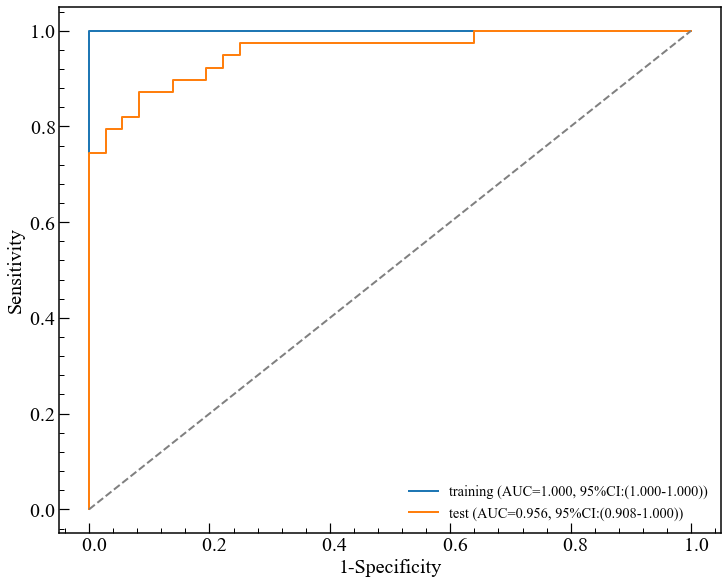

In [5]:
single_result = model_results[0]
single_result.plot_roc_auc(dataset=['training','test'])

In [6]:
# single_result.plot_multi_class_roc_auc()

## The multi-Roc from different files

<Figure size 432x288 with 0 Axes>

<Figure size 720x576 with 0 Axes>

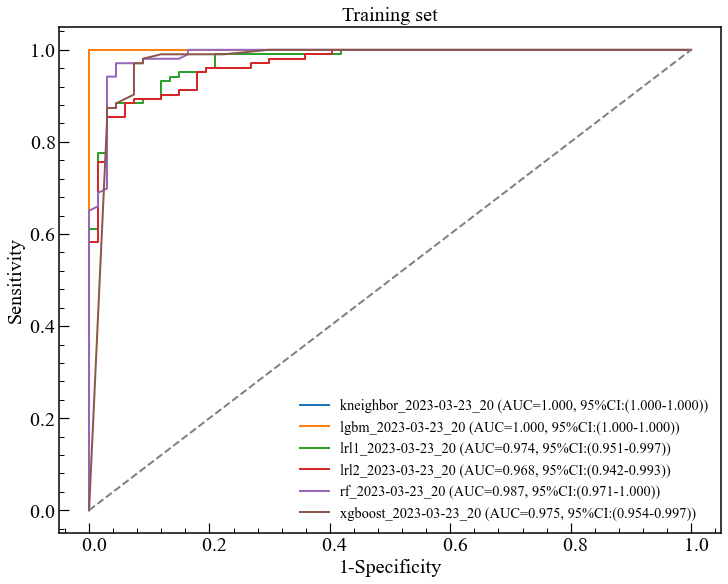

In [7]:
multi_results = MultiModelResultsEvaluation(model_results)
_ = multi_results.plot_roc_auc(dataset='test', title='Test set', savefig=outdir/'test_rocauc.png')
_ = multi_results.plot_roc_auc(dataset='training', title='Training set', savefig=outdir/'training_rocauc.png')

In [8]:
# _ = multi_results.plot_roc_auc(dataset='external', title='External set')

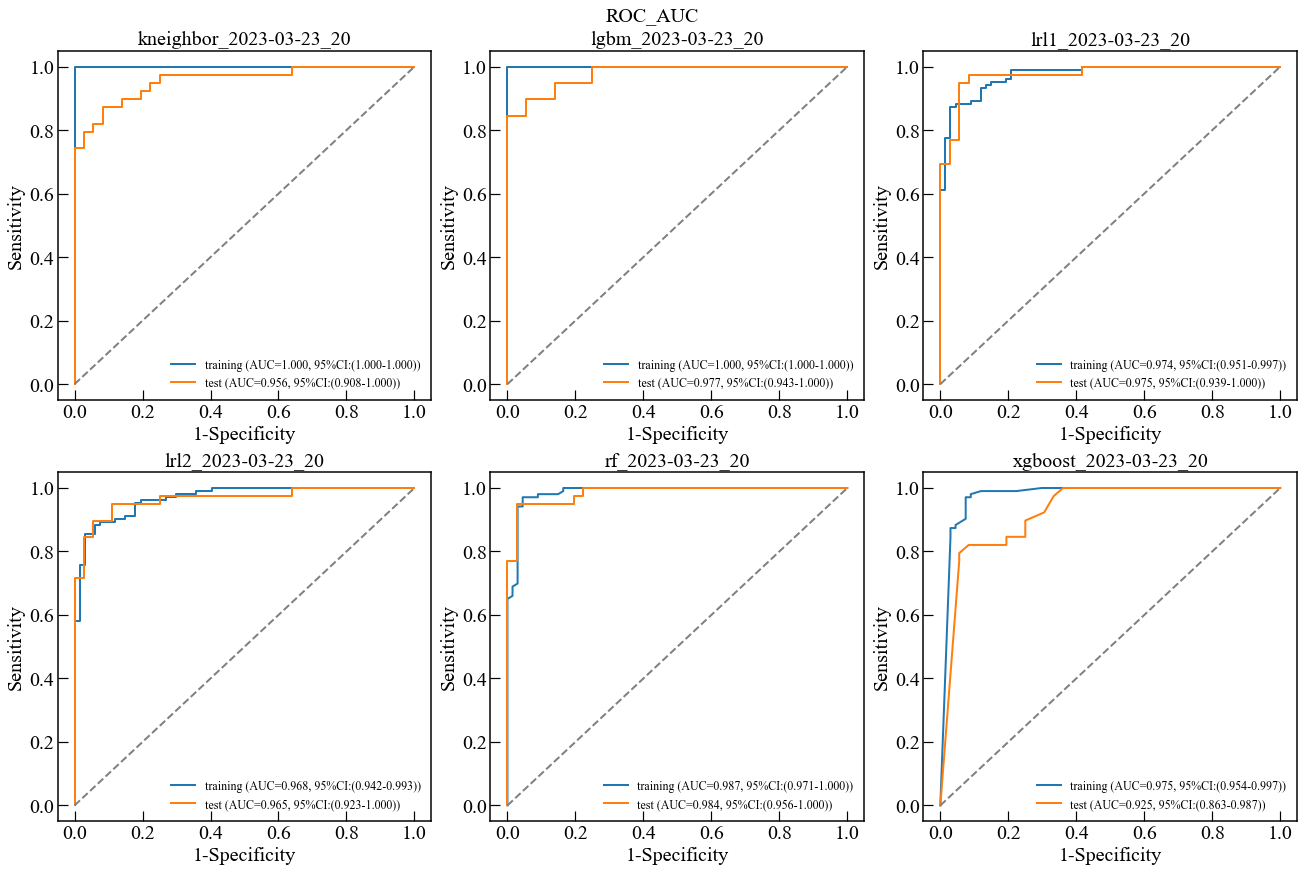

In [9]:
_ = multi_results.plot_roc_auc_multi(dataset=['training', 'test'], savefig=outdir/'roc_auc.png', title='name')

## The confusion matrix for different dataset

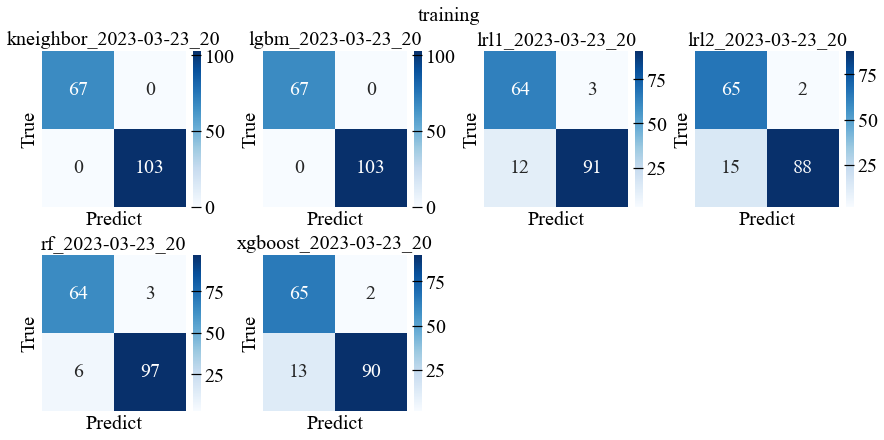

In [10]:
_ = multi_results.plot_confusion_matrix_multi(dataset='training', savefig=outdir/'training_cm.png', fig_titles='name')

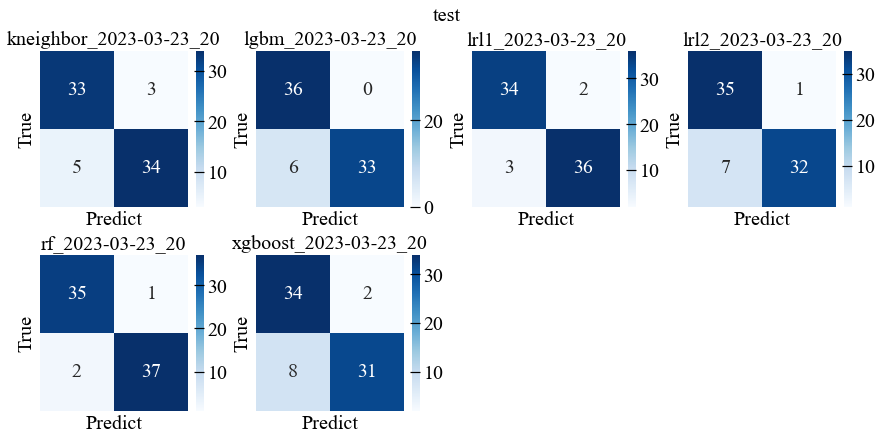

In [11]:
_ = multi_results.plot_confusion_matrix_multi(dataset='test', savefig=outdir/'test_cm.png', fig_titles='name')

In [12]:
# _ = multi_results.plot_confusion_matrix_multi(dataset='external', savefig=outdir/'CM_external.png', fig_titles='name')

## Evaluate the metrics for different dataset

In [13]:
eval_tab = multi_results.evaluation(dataset='training')
eval_tab.to_csv(outdir/'evaluation_training.csv', index=0)
eval_tab

,data,auc,accuracy,recall,specificity,f1
0,kneighbor_2023-03-23_20,1.000000,1.000000,1.000000,1.000000,1.000000
1,lgbm_2023-03-23_20,1.000000,1.000000,1.000000,1.000000,1.000000
2,lrl1_2023-03-23_20,0.973917,0.911765,0.883495,0.955224,0.923858
3,lrl2_2023-03-23_20,0.967686,0.900000,0.854369,0.970149,0.911917
4,rf_2023-03-23_20,0.986741,0.947059,0.941748,0.955224,0.955665
5,xgboost_2023-03-23_20,0.975438,0.911765,0.873786,0.970149,0.923077


In [14]:
eval_tab = multi_results.evaluation()
eval_tab.to_csv(outdir/'evaluation_test.csv', index=0)
eval_tab

,data,auc,accuracy,recall,specificity,f1
0,kneighbor_2023-03-23_20,0.955840,0.893333,0.871795,0.916667,0.894737
1,lgbm_2023-03-23_20,0.977208,0.920000,0.846154,1.000000,0.916667
2,lrl1_2023-03-23_20,0.975071,0.933333,0.923077,0.944444,0.935065
3,lrl2_2023-03-23_20,0.965100,0.893333,0.820513,0.972222,0.888889
4,rf_2023-03-23_20,0.984330,0.960000,0.948718,0.972222,0.961039
5,xgboost_2023-03-23_20,0.925214,0.866667,0.794872,0.944444,0.861111


In [15]:
# eval_tab = multi_results.evaluation(dataset='external')
# print(eval_tab)

## Delong test

In [16]:
pd.set_option('display.max_columns',500)
pd.set_option('display.width', 1000)
delong_test = multi_results.delong_test(dataset='test')
delong_test.to_csv(outdir/'delong_test.csv')
delong_test

,kneighbor_2023-03-23_20,lgbm_2023-03-23_20,lrl1_2023-03-23_20,lrl2_2023-03-23_20,rf_2023-03-23_20,xgboost_2023-03-23_20
kneighbor_2023-03-23_20,1.0000,0.2221,0.1171,0.2192,0.0795,0.2956
lgbm_2023-03-23_20,0.2221,1.0000,0.8805,0.4697,0.4392,0.0333
lrl1_2023-03-23_20,0.1171,0.8805,1.0000,0.3079,0.3482,0.0723
lrl2_2023-03-23_20,0.2192,0.4697,0.3079,1.0000,0.2107,0.1542
rf_2023-03-23_20,0.0795,0.4392,0.3482,0.2107,1.0000,0.0221
xgboost_2023-03-23_20,0.2956,0.0333,0.0723,0.1542,0.0221,1.0000


In [17]:
# delong_test = multi_results.delong_test(dataset='external')
# print(delong_test)